## Common Causes of Death Analysis 
#Justin, Thomas, Karuna, Joseph, Harleen and Grant!

In [1]:
#import dependencies 
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib as plt



In [21]:
#paths to csv data
Cause_df = 'Resources/cause_of_deaths.csv'
Aid_df = 'Resources/us_foreign_aid_country.csv'
pop_data_path="Resources/popdata.csv"

#reading csv data and creating dataframes out of it
Cause_df = pd.read_csv(Cause_df)
Aid_df = pd.read_csv(Aid_df)
pop_data_df=pd.read_csv(pop_data_path)
#changing year from int to str for merging
Cause_df['Year'] = Cause_df['Year'].astype(str)
pop_data_df['Year'] =pop_data_df['Year'].astype(str)
#rename columns for merge 
Aid_df = Aid_df.rename(columns = {'Country Code' : 'Code',
                                 'Fiscal Year' : 'Year',
                                 'Country Name' : 'Country/Territory',
                                 'current_amount':'Current Amount of Aid Given by US ($USD)',
                                  'constant_amount':'Constant Amount of Aid Given by US ($USD)',
                                 'Income Group Name':'Country Income Category'})

#obligation only transactoin type
Aid_df=Aid_df.loc[(Aid_df['Transaction Type Name']== 'Obligations')]

#Filtering aid_df
Aid_df=Aid_df[['Year','Country/Territory','Code','Country Income Category','Current Amount of Aid Given by US ($USD)','Constant Amount of Aid Given by US ($USD)']]


#merging
Cause_aid_df = Cause_df.merge(Aid_df, on = ['Code', 'Year', 'Country/Territory'])

Cause_aid_df.head()
cause_aid_pop_df=Cause_aid_df.merge(pop_data_df,on=['Code','Year'])

cause_aid_pop_df.to_csv('Resources/cause_aid_pop.csv')
cause_aid_pop_df.head()


,Country/Territory,Code,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,...,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis,Country Income Category,Current Amount of Aid Given by US ($USD),Constant Amount of Aid Given by US ($USD),Population
0,Afghanistan,AFG,1990,2159,1116,371,2087,93,1370,1538,...,4154,5945,2673,5005,323,2985,Low Income Country,15222050,30254306,10694796
1,Afghanistan,AFG,1991,2218,1136,374,2153,189,1391,2001,...,4472,6050,2728,5120,332,3092,Low Income Country,20140068,38650393,10745167
2,Afghanistan,AFG,1992,2475,1162,378,2441,239,1514,2299,...,5106,6223,2830,5335,360,3325,Low Income Country,31593344,59151797,12057433
3,Afghanistan,AFG,1993,2812,1187,384,2837,108,1687,2589,...,5681,6445,2943,5568,396,3601,Low Income Country,38124000,69740780,14003760
4,Afghanistan,AFG,1994,3027,1211,391,3081,211,1809,2849,...,6001,6664,3027,5739,420,3816,Low Income Country,2462000,4407728,15455555


In [3]:
cause_aid_pop_df.columns

Index(['Country/Territory', 'Code', 'Year', 'Meningitis',
       'Alzheimer's Disease and Other Dementias', 'Parkinson's Disease',
       'Nutritional Deficiencies', 'Malaria', 'Drowning',
       'Interpersonal Violence', 'Maternal Disorders', 'HIV/AIDS',
       'Drug Use Disorders', 'Tuberculosis', 'Cardiovascular Diseases',
       'Lower Respiratory Infections', 'Neonatal Disorders',
       'Alcohol Use Disorders', 'Self-harm', 'Exposure to Forces of Nature',
       'Diarrheal Diseases', 'Environmental Heat and Cold Exposure',
       'Neoplasms', 'Conflict and Terrorism', 'Diabetes Mellitus',
       'Chronic Kidney Disease', 'Poisonings', 'Protein-Energy Malnutrition',
       'Road Injuries', 'Chronic Respiratory Diseases',
       'Cirrhosis and Other Chronic Liver Diseases', 'Digestive Diseases',
       'Fire, Heat, and Hot Substances', 'Acute Hepatitis',
       'Country Income Category', 'Current Amount of Aid Given by US ($USD)',
       'Constant Amount of Aid Given by US ($USD)',

In [4]:
#looking for most and least deadly from 1990-2019
top_deaths_df=cause_aid_pop_df[['Meningitis',
       "Alzheimer's Disease and Other Dementias", "Parkinson's Disease",
       'Nutritional Deficiencies', 'Malaria', 'Drowning',
       'Interpersonal Violence', 'Maternal Disorders', 'HIV/AIDS',
       'Drug Use Disorders', 'Tuberculosis', 'Cardiovascular Diseases',
       'Lower Respiratory Infections', 'Neonatal Disorders',
       'Alcohol Use Disorders', 'Self-harm', 'Exposure to Forces of Nature',
       'Diarrheal Diseases', 'Environmental Heat and Cold Exposure',
       'Neoplasms', 'Conflict and Terrorism', 'Diabetes Mellitus',
       'Chronic Kidney Disease', 'Poisonings', 'Protein-Energy Malnutrition',
       'Road Injuries', 'Chronic Respiratory Diseases',
       'Cirrhosis and Other Chronic Liver Diseases', 'Digestive Diseases',
       'Fire, Heat, and Hot Substances', 'Acute Hepatitis']].sum()

top_deaths_df=top_deaths_df.sort_values(ascending=False)
top_deaths_df.head()
top_deaths=top_deaths_df[:5]
display(top_deaths)
top_deaths.index

Cardiovascular Diseases         305598624
Neoplasms                       142008849
Neonatal Disorders               68820123
Lower Respiratory Infections     68227438
Diarrheal Diseases               62439459
dtype: int64

Index(['Cardiovascular Diseases', 'Neoplasms', 'Neonatal Disorders',
       'Lower Respiratory Infections', 'Diarrheal Diseases'],
      dtype='object')

In [5]:
#least deadly causes of death 1990-2019
least_deaths_df=top_deaths_df.sort_values()
least_deaths_df.head()
least_deaths=least_deaths_df[:5]
display(least_deaths)
least_deaths.index


Exposure to Forces of Nature            1144268
Environmental Heat and Cold Exposure    1502732
Poisonings                              1649724
Drug Use Disorders                      1846550
Conflict and Terrorism                  2645144
dtype: int64

Index(['Exposure to Forces of Nature', 'Environmental Heat and Cold Exposure',
       'Poisonings', 'Drug Use Disorders', 'Conflict and Terrorism'],
      dtype='object')

In [6]:
#top deaths per country
top_death_country=cause_aid_pop_df.groupby(['Code'])[['Cardiovascular Diseases', 'Neoplasms', 'Neonatal Disorders',
       'Lower Respiratory Infections', 'Diarrheal Diseases']].sum()
display(top_death_country)

,Cardiovascular Diseases,Neoplasms,Neonatal Disorders,Lower Respiratory Infections,Diarrheal Diseases
Code,,,,,
AFG,1607042,469611,697534,822179,245832
AGO,525047,237225,554921,564508,810148
ALB,263902,99961,14696,24262,601
ARE,84302,50790,2580,6941,697
ARG,2836128,2113666,173947,697414,23155
...,...,...,...,...,...
VUT,15374,3900,2163,2585,1744
YEM,1110837,234015,729558,259044,419051
ZAF,2234693,1360234,674828,983661,600313


In [7]:
#top deaths per country by year
top_death_country_year=cause_aid_pop_df.groupby(['Code','Year'])[['Cardiovascular Diseases', 'Neoplasms', 'Neonatal Disorders',
       'Lower Respiratory Infections', 'Diarrheal Diseases']].sum()
top_death_country_year

Cardiovascular Diseases  Neoplasms  Neonatal Disorders  \
Code Year                                                           
AFG  1990                    44899      11580               15612   
     1991                    45492      11796               17128   
     1992                    46557      12218               20060   
     1993                    47951      12634               22335   
     1994                    49308      12914               23288   
...                            ...        ...                 ...   
ZWE  2015                    16649      11161                9278   
     2016                    16937      11465                9065   
     2017                    17187      11744                8901   
     2018                    17460      12038                8697   
     2019                    17810      12353                8609   

           Lower Respiratory Infections  Diarrheal Diseases  
Code Year                                                    
AFG  1990                         23741                4235  
     1991                         24504                4927  
     1992                         27404                6123  
     1993                         31116                8174  
     1994                         33390                8215  
...                                 ...                 ...  
ZWE  2015                         12974                5102  
     2016                         13024                5002  
     2017                         12961                4948  
     2018                         12860                4745  
     2019                         12897                4635  

[4584 rows x 5 columns]

In [8]:
#bottom deaths per country 
bottom_death_country=cause_aid_pop_df.groupby(['Code'])[['Exposure to Forces of Nature', 'Environmental Heat and Cold Exposure',
       'Poisonings', 'Drug Use Disorders', 'Conflict and Terrorism']].sum()
display(bottom_death_country)

,Exposure to Forces of Nature,Environmental Heat and Cold Exposure,Poisonings,Drug Use Disorders,Conflict and Terrorism
Code,,,,,
AFG,16770,2187,14530,7094,280520
AGO,742,3520,14022,1190,54203
ALB,89,159,487,629,2145
ARE,0,159,535,9009,2
ARG,425,1567,8654,1535,773
...,...,...,...,...,...
VUT,175,27,54,27,0
YEM,1131,1049,12561,3718,95610
ZAF,877,15128,20736,7414,3788


In [9]:
#bottom deaths per country by year
bottom_death_country_year=cause_aid_pop_df.groupby(['Code','Year'])[['Exposure to Forces of Nature', 'Environmental Heat and Cold Exposure',
       'Poisonings', 'Drug Use Disorders', 'Conflict and Terrorism']].sum()
bottom_death_country_year

Exposure to Forces of Nature  Environmental Heat and Cold Exposure  \
Code Year                                                                       
AFG  1990                             0                                   175   
     1991                          1347                                   113   
     1992                           614                                    38   
     1993                           225                                    41   
     1994                           160                                    44   
...                                 ...                                   ...   
ZWE  2015                            16                                    37   
     2016                            31                                    37   
     2017                           251                                    37   
     2018                             0                                    37   
     2019                           660                                    37   

           Poisonings  Drug Use Disorders  Conflict and Terrorism  
Code Year                                                          
AFG  1990         338                  93                    1490  
     1991         351                 102                    3370  
     1992         386                 118                    4344  
     1993         425                 132                    4096  
     1994         451                 142                    8959  
...               ...                 ...                     ...  
ZWE  2015         381                 104                      13  
     2016         393                 110                       6  
     2017         398                 115                       5  
     2018         400                 121                       9  
     2019         405                 127                      11  

[4584 rows x 5 columns]

In [10]:
#making a df for deaths per capita 
per_capita_death_df=cause_aid_pop_df[['Code','Year','Meningitis',
       "Alzheimer's Disease and Other Dementias", "Parkinson's Disease",
       'Nutritional Deficiencies', 'Malaria', 'Drowning',
       'Interpersonal Violence', 'Maternal Disorders', 'HIV/AIDS',
       'Drug Use Disorders', 'Tuberculosis', 'Cardiovascular Diseases',
       'Lower Respiratory Infections', 'Neonatal Disorders',
       'Alcohol Use Disorders', 'Self-harm', 'Exposure to Forces of Nature',
       'Diarrheal Diseases', 'Environmental Heat and Cold Exposure',
       'Neoplasms', 'Conflict and Terrorism', 'Diabetes Mellitus',
       'Chronic Kidney Disease', 'Poisonings', 'Protein-Energy Malnutrition',
       'Road Injuries', 'Chronic Respiratory Diseases',
       'Cirrhosis and Other Chronic Liver Diseases', 'Digestive Diseases',
       'Fire, Heat, and Hot Substances', 'Acute Hepatitis','Population']].set_index("Code")

#need to itterate over the columns and divide each death column by the population i would assume its some sort of for loop
# per_capita_death_df['Meningitis Death per Capita']=per_capita_death_df['Meningitis']/per_capita_death_df['Population']
display(per_capita_death_df)


,Year,Meningitis,Alzheimer's Disease and Other Dementias,Parkinson's Disease,Nutritional Deficiencies,Malaria,Drowning,Interpersonal Violence,Maternal Disorders,HIV/AIDS,...,Chronic Kidney Disease,Poisonings,Protein-Energy Malnutrition,Road Injuries,Chronic Respiratory Diseases,Cirrhosis and Other Chronic Liver Diseases,Digestive Diseases,"Fire, Heat, and Hot Substances",Acute Hepatitis,Population
Code,,,,,,,,,,,,,,,,,,,,,
AFG,1990,2159,1116,371,2087,93,1370,1538,2655,34,...,3709,338,2054,4154,5945,2673,5005,323,2985,10694796
AFG,1991,2218,1136,374,2153,189,1391,2001,2885,41,...,3724,351,2119,4472,6050,2728,5120,332,3092,10745167
AFG,1992,2475,1162,378,2441,239,1514,2299,3315,48,...,3776,386,2404,5106,6223,2830,5335,360,3325,12057433
AFG,1993,2812,1187,384,2837,108,1687,2589,3671,56,...,3862,425,2797,5681,6445,2943,5568,396,3601,14003760
AFG,1994,3027,1211,391,3081,211,1809,2849,3863,63,...,3932,451,3038,6001,6664,3027,5739,420,3816,15455555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZWE,2015,1439,754,215,3019,2518,770,1302,1355,29162,...,2108,381,2990,2373,2751,1956,4202,632,146,14154937
ZWE,2016,1457,767,219,3056,2050,801,1342,1338,27141,...,2160,393,3027,2436,2788,1962,4264,648,146,14452704
ZWE,2017,1460,781,223,2990,2116,818,1363,1312,24846,...,2196,398,2962,2473,2818,2007,4342,654,144,14751101


In [11]:
#adding columns for death per capita for each cause of death and the data in those new columns
column_list=per_capita_death_df.columns.values
for column in column_list[1:(len(column_list)-1)]:
    per_capita_death_df[f'{column} Death per Capita']=per_capita_death_df[column]/per_capita_death_df['Population']*100



In [12]:
per_capita_death_df.columns

Index(['Year', 'Meningitis', 'Alzheimer's Disease and Other Dementias',
       'Parkinson's Disease', 'Nutritional Deficiencies', 'Malaria',
       'Drowning', 'Interpersonal Violence', 'Maternal Disorders', 'HIV/AIDS',
       'Drug Use Disorders', 'Tuberculosis', 'Cardiovascular Diseases',
       'Lower Respiratory Infections', 'Neonatal Disorders',
       'Alcohol Use Disorders', 'Self-harm', 'Exposure to Forces of Nature',
       'Diarrheal Diseases', 'Environmental Heat and Cold Exposure',
       'Neoplasms', 'Conflict and Terrorism', 'Diabetes Mellitus',
       'Chronic Kidney Disease', 'Poisonings', 'Protein-Energy Malnutrition',
       'Road Injuries', 'Chronic Respiratory Diseases',
       'Cirrhosis and Other Chronic Liver Diseases', 'Digestive Diseases',
       'Fire, Heat, and Hot Substances', 'Acute Hepatitis', 'Population',
       'Meningitis Death per Capita',
       'Alzheimer's Disease and Other Dementias Death per Capita',
       'Parkinson's Disease Death per Capita',

In [13]:
#create a new df with just death per capita stats
death_per_capita_df=per_capita_death_df[['Year','Meningitis Death per Capita',
       "Alzheimer's Disease and Other Dementias Death per Capita",
       "Parkinson's Disease Death per Capita",
       'Nutritional Deficiencies Death per Capita', 'Malaria Death per Capita',
       'Drowning Death per Capita', 'Interpersonal Violence Death per Capita',
       'Maternal Disorders Death per Capita', 'HIV/AIDS Death per Capita',
       'Drug Use Disorders Death per Capita', 'Tuberculosis Death per Capita',
       'Cardiovascular Diseases Death per Capita',
       'Lower Respiratory Infections Death per Capita',
       'Neonatal Disorders Death per Capita',
       'Alcohol Use Disorders Death per Capita', 'Self-harm Death per Capita',
       'Exposure to Forces of Nature Death per Capita',
       'Diarrheal Diseases Death per Capita',
       'Environmental Heat and Cold Exposure Death per Capita',
       'Neoplasms Death per Capita', 'Conflict and Terrorism Death per Capita',
       'Diabetes Mellitus Death per Capita',
       'Chronic Kidney Disease Death per Capita',
       'Poisonings Death per Capita',
       'Protein-Energy Malnutrition Death per Capita',
       'Road Injuries Death per Capita',
       'Chronic Respiratory Diseases Death per Capita',
       'Cirrhosis and Other Chronic Liver Diseases Death per Capita',
       'Digestive Diseases Death per Capita',
       'Fire, Heat, and Hot Substances Death per Capita',
       'Acute Hepatitis Death per Capita','Population']]
death_per_capita_df.head(5)


,Year,Meningitis Death per Capita,Alzheimer's Disease and Other Dementias Death per Capita,Parkinson's Disease Death per Capita,Nutritional Deficiencies Death per Capita,Malaria Death per Capita,Drowning Death per Capita,Interpersonal Violence Death per Capita,Maternal Disorders Death per Capita,HIV/AIDS Death per Capita,...,Chronic Kidney Disease Death per Capita,Poisonings Death per Capita,Protein-Energy Malnutrition Death per Capita,Road Injuries Death per Capita,Chronic Respiratory Diseases Death per Capita,Cirrhosis and Other Chronic Liver Diseases Death per Capita,Digestive Diseases Death per Capita,"Fire, Heat, and Hot Substances Death per Capita",Acute Hepatitis Death per Capita,Population
Code,,,,,,,,,,,,,,,,,,,,,
AFG,1990,0.020187,0.010435,0.003469,0.019514,0.000870,0.012810,0.014381,0.024825,0.000318,...,0.034680,0.003160,0.019206,0.038841,0.055588,0.024993,0.046798,0.003020,0.027911,10694796
AFG,1991,0.020642,0.010572,0.003481,0.020037,0.001759,0.012945,0.018622,0.026849,0.000382,...,0.034657,0.003267,0.019720,0.041619,0.056304,0.025388,0.047649,0.003090,0.028776,10745167
AFG,1992,0.020527,0.009637,0.003135,0.020245,0.001982,0.012557,0.019067,0.027493,0.000398,...,0.031317,0.003201,0.019938,0.042347,0.051611,0.023471,0.044247,0.002986,0.027576,12057433
AFG,1993,0.020080,0.008476,0.002742,0.020259,0.000771,0.012047,0.018488,0.026214,0.000400,...,0.027578,0.003035,0.019973,0.040568,0.046023,0.021016,0.039761,0.002828,0.025715,14003760
AFG,1994,0.019585,0.007835,0.002530,0.019935,0.001365,0.011705,0.018434,0.024994,0.000408,...,0.025441,0.002918,0.019656,0.038827,0.043117,0.019585,0.037132,0.002717,0.024690,15455555


In [14]:
afg_death=death_per_capita_df.loc[(death_per_capita_df.index.values=='AFG')]
afg_death

,Year,Meningitis Death per Capita,Alzheimer's Disease and Other Dementias Death per Capita,Parkinson's Disease Death per Capita,Nutritional Deficiencies Death per Capita,Malaria Death per Capita,Drowning Death per Capita,Interpersonal Violence Death per Capita,Maternal Disorders Death per Capita,HIV/AIDS Death per Capita,...,Chronic Kidney Disease Death per Capita,Poisonings Death per Capita,Protein-Energy Malnutrition Death per Capita,Road Injuries Death per Capita,Chronic Respiratory Diseases Death per Capita,Cirrhosis and Other Chronic Liver Diseases Death per Capita,Digestive Diseases Death per Capita,"Fire, Heat, and Hot Substances Death per Capita",Acute Hepatitis Death per Capita,Population
Code,,,,,,,,,,,,,,,,,,,,,
AFG,1990,0.020187,0.010435,0.003469,0.019514,0.000870,0.012810,0.014381,0.024825,0.000318,...,0.034680,0.003160,0.019206,0.038841,0.055588,0.024993,0.046798,0.003020,0.027911,10694796
AFG,1991,0.020642,0.010572,0.003481,0.020037,0.001759,0.012945,0.018622,0.026849,0.000382,...,0.034657,0.003267,0.019720,0.041619,0.056304,0.025388,0.047649,0.003090,0.028776,10745167
AFG,1992,0.020527,0.009637,0.003135,0.020245,0.001982,0.012557,0.019067,0.027493,0.000398,...,0.031317,0.003201,0.019938,0.042347,0.051611,0.023471,0.044247,0.002986,0.027576,12057433
AFG,1993,0.020080,0.008476,0.002742,0.020259,0.000771,0.012047,0.018488,0.026214,0.000400,...,0.027578,0.003035,0.019973,0.040568,0.046023,0.021016,0.039761,0.002828,0.025715,14003760
AFG,1994,0.019585,0.007835,0.002530,0.019935,0.001365,0.011705,0.018434,0.024994,0.000408,...,0.025441,0.002918,0.019656,0.038827,0.043117,0.019585,0.037132,0.002717,0.024690,15455555
AFG,1995,0.018893,0.007461,0.002400,0.019069,0.001066,0.011456,0.018083,0.024575,0.000432,...,0.024204,0.002844,0.018801,0.037828,0.041556,0.018734,0.035587,0.002643,0.024033,16418912
AFG,1996,0.018665,0.007243,0.002327,0.018560,0.001023,0.011510,0.019472,0.024569,0.000456,...,0.023622,0.002835,0.018297,0.037681,0.040920,0.018315,0.034875,0.002631,0.023956,17106595
AFG,1997,0.018573,0.007044,0.002260,0.018270,0.001349,0.011681,0.017022,0.024459,0.000472,...,0.023014,0.002833,0.018006,0.037535,0.040295,0.017989,0.034269,0.002636,0.023903,17788819
AFG,1998,0.017742,0.006851,0.002190,0.017266,0.003044,0.011345,0.016752,0.023776,0.000481,...,0.022279,0.002731,0.017006,0.036138,0.039404,0.017471,0.033277,0.002552,0.023306,18493132


In [15]:
top_deaths=['Year','Cardiovascular Diseases Death per Capita', 'Neoplasms Death per Capita', 'Neonatal Disorders Death per Capita',
       'Lower Respiratory Infections Death per Capita', 'Diarrheal Diseases Death per Capita']
afg_death_top=afg_death[top_deaths]
afg_death_top.astype(float)

,Year,Cardiovascular Diseases Death per Capita,Neoplasms Death per Capita,Neonatal Disorders Death per Capita,Lower Respiratory Infections Death per Capita,Diarrheal Diseases Death per Capita
Code,,,,,,
AFG,1990.0,0.419821,0.108277,0.145978,0.221986,0.039599
AFG,1991.0,0.423372,0.109780,0.159402,0.228047,0.045853
AFG,1992.0,0.386127,0.101332,0.166370,0.227279,0.050782
AFG,1993.0,0.342415,0.090219,0.159493,0.222197,0.058370
AFG,1994.0,0.319031,0.083556,0.150677,0.216039,0.053152
AFG,1995.0,0.305489,0.079823,0.144480,0.207261,0.058262
AFG,1996.0,0.298861,0.077952,0.140905,0.203354,0.056598
AFG,1997.0,0.292538,0.076295,0.136985,0.199929,0.059903
AFG,1998.0,0.285079,0.074055,0.129832,0.188951,0.060320


<Axes: title={'center': 'Top 5 Causes of Death'}, xlabel='Year'>

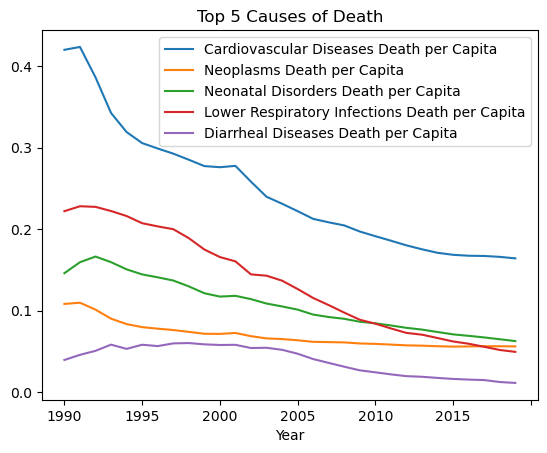

In [16]:
#plot of the top 5 causes of death from 1990-2019 looking at it per capita this time in AFG
afg_death_top.plot(x='Year',title='Top 5 Causes of Death')

<Axes: title={'center': 'Bottom 5 Causes of Death'}, xlabel='Year'>

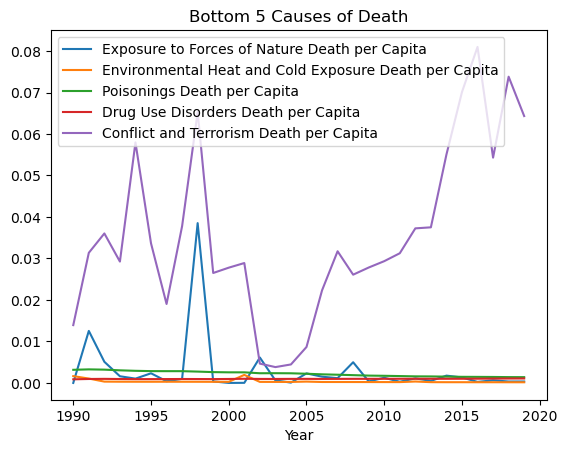

In [17]:
#plot of the bottom 5 causes of death from 1990-2019 looking at it per capita this time in AFG
bottom_deaths=['Year','Exposure to Forces of Nature Death per Capita', 'Environmental Heat and Cold Exposure Death per Capita',
       'Poisonings Death per Capita', 'Drug Use Disorders Death per Capita', 'Conflict and Terrorism Death per Capita']
afg_death_bottom=afg_death[bottom_deaths].astype(float)
afg_death_bottom.plot(x='Year',title='Bottom 5 Causes of Death')


                           
                           

In [18]:
usa_death=death_per_capita_df.loc[(death_per_capita_df.index.values=='USA')]
usa_death.sort_values('Year',inplace=True)

C:\Users\thomas\AppData\Local\Temp\ipykernel_11652\306525102.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa_death.sort_values('Year',inplace=True)


In [19]:
top_deaths=['Year','Cardiovascular Diseases Death per Capita', 'Neoplasms Death per Capita', 'Neonatal Disorders Death per Capita',
       'Lower Respiratory Infections Death per Capita', 'Diarrheal Diseases Death per Capita']
usa_death_top=usa_death[top_deaths].astype(float)
usa_death_top

,Year,Cardiovascular Diseases Death per Capita,Neoplasms Death per Capita,Neonatal Disorders Death per Capita,Lower Respiratory Infections Death per Capita,Diarrheal Diseases Death per Capita
Code,,,,,,
USA,1990.0,0.352390,0.215981,0.007734,0.029130,0.000273
USA,1991.0,0.346982,0.215336,0.007237,0.029115,0.000295
USA,1992.0,0.341109,0.214772,0.006728,0.029043,0.000318
USA,1993.0,0.344371,0.217644,0.006425,0.029824,0.000356
USA,1994.0,0.341924,0.217888,0.006042,0.029980,0.000393
USA,1995.0,0.341343,0.218708,0.005649,0.030202,0.000439
USA,1996.0,0.336685,0.216487,0.005394,0.030040,0.000494
USA,1997.0,0.331675,0.214105,0.005296,0.029743,0.000576
USA,1998.0,0.329619,0.213525,0.005304,0.029506,0.000691


<Axes: xlabel='Year'>

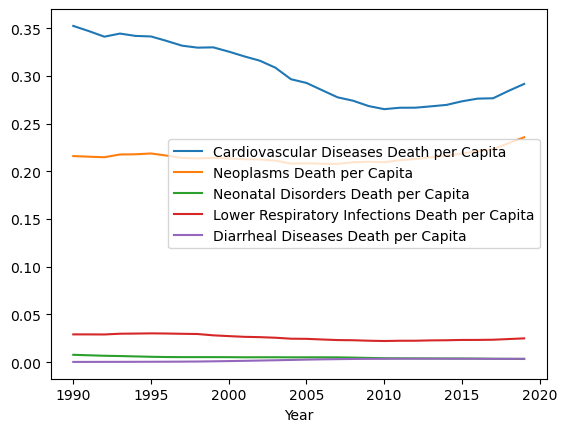

In [36]:
usa_death_top.plot(x='Year')

In [14]:

# Questions to Answer:
# What are the most common causes of death internationally? - look at least common causes too, just to see if we can make any inferences from that. 
# Death totals(most / least common) - normalize it to the population
# Line plot for time vs cause of death amount in certain # of nations
# Look at the US vs other places specifically, too.
# Compare the US to other countries
# Histogram to scale most prevalent causes of death 
# Box plot looking at variance 



In [15]:

# Where are those most common causes occurring (maybe just look at a few?)
# Geoapify graph?
# Most comm
#  Bar plot, 



In [16]:
 
# How does a certain disease/cause of death trend year over year?
# Line graph
# Scatter plot for various correlations regarding C.O.D. by year, decade, in x# of nations.. 

In [79]:
#What outside events may have influenced those causes of death?
# Availability of aid?
# Medical resources
# Water-related illness
# Geoapify map (malaria is easy to show geographical differences)
# Geoapify map for the amount of aid provided to the nations with the unique causes of death that may have been mitigated by aid 

import hvplot.pandas
import pandas as pd
import geoviews as gv
import geoviews.tile_sources as gvts
import geopandas as gpd

countries_info = pd.read_csv('Resources/countries.csv')

country_totals = (cause_aid_pop_df.groupby(['Country/Territory'])[['Meningitis',
       "Alzheimer's Disease and Other Dementias", "Parkinson's Disease",
       'Nutritional Deficiencies', 'Malaria', 'Drowning',
       'Interpersonal Violence', 'Maternal Disorders', 'HIV/AIDS',
       'Drug Use Disorders', 'Tuberculosis', 'Cardiovascular Diseases',
       'Lower Respiratory Infections', 'Neonatal Disorders',
       'Alcohol Use Disorders', 'Self-harm', 'Exposure to Forces of Nature',
       'Diarrheal Diseases', 'Environmental Heat and Cold Exposure',
       'Neoplasms', 'Conflict and Terrorism', 'Diabetes Mellitus',
       'Chronic Kidney Disease', 'Poisonings', 'Protein-Energy Malnutrition',
       'Road Injuries', 'Chronic Respiratory Diseases',
       'Cirrhosis and Other Chronic Liver Diseases', 'Digestive Diseases',
       'Fire, Heat, and Hot Substances', 'Acute Hepatitis']]).sum()
country_totals=country_totals.reset_index()

#country_totals=country_totals.set_index("Country/Territory")
countries_df = pd.read_csv("Resources/countries.csv")

# Iterate through the values in the "Country/Territory" column of country_totals DataFrame
for country_name in country_totals["Country/Territory"]:
    # Check if the country name is in the countries DataFrame
    matching_row = countries_df[countries_df["name"] == country_name]
    # If there is a match, retrieve longitude and latitude
    if not matching_row.empty:
        country_longitude = matching_row["longitude"].values[0]
        country_latitude = matching_row["latitude"].values[0]
        # Update the country_totals DataFrame with longitude and latitude
        country_totals.loc[country_totals["Country/Territory"] == country_name, "Longitude"] = country_longitude
        country_totals.loc[country_totals["Country/Territory"] == country_name, "Latitude"] = country_latitude
                
country_totals.to_csv("results.csv", index=False)

In [89]:
map_plot = country_totals.hvplot.points("Longitude", "Latitude", geo = True, tiles = "OSM", frame_width = 800, frame_height = 600, hover_cols=['Malaria', 'Country/Territory'], size = "Malaria", scale = 0.010, color = "Country/Territory")

map_plot

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [Longitude,Latitude]   (Country/Territory,Malaria)

In [18]:
# Is there any correlation between causes of death in a given area? Why?
#  Scatter plot for causes of death to each other by place, year ext.
    